<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kerakli kutubxonalarni yuklab olamiz

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# **Klassik dastur**

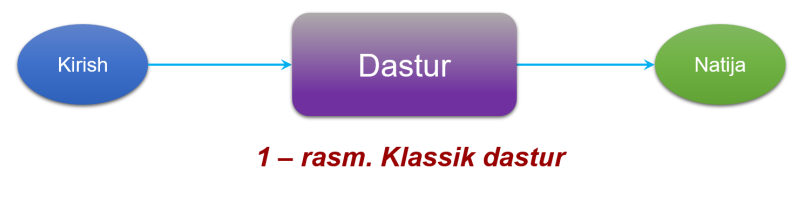

## Kerakli datalarni o'rnatamiz

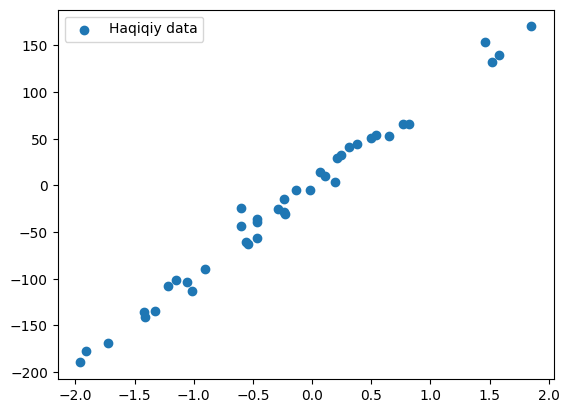

In [ ]:
# DATA
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]
plt.scatter(x_data, y_data, label='Haqiqiy data')
plt.legend()
plt.show()

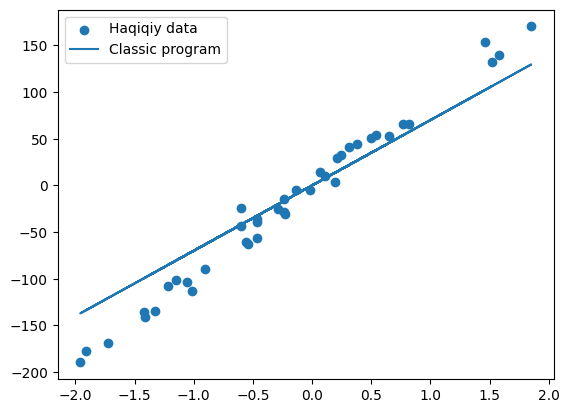

In [ ]:
def classic_program(x): return x*70

y_pred = [classic_program(x) for x in x_data]
plt.scatter(x_data, y_data, label='Haqiqiy data')
plt.plot(x_data, y_pred, label='Classic program')
plt.legend()
plt.show()

# **Vazn qo'llanilgan dastur**

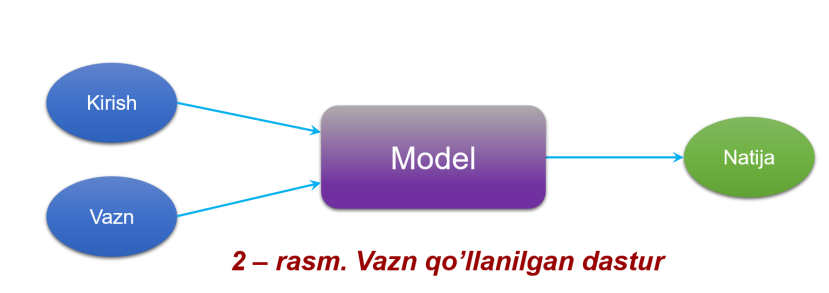

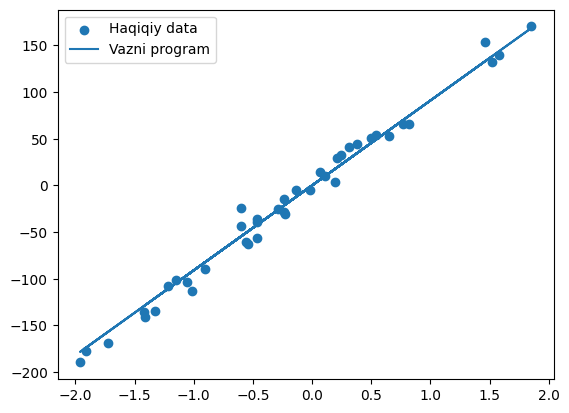

In [ ]:
#data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]

def weight_assigned_program(x, w): return w*x*70
w = 1.3

y_pred = [weight_assigned_program(x, w) for x in x_data]

#plotting
plt.scatter(x_data, y_data, label='Haqiqiy data')
plt.plot(x_data, y_pred, label='Vazni program')
plt.legend()
plt.show()

Dastur endi Model deb yuritilmoqda. Sabai model ham o'zi dastur hisoblanib, dasturdan darqli o'laroq endi parametlarga hamm ega bo'ldi!

# **Machine Learning modelini o'qitish**

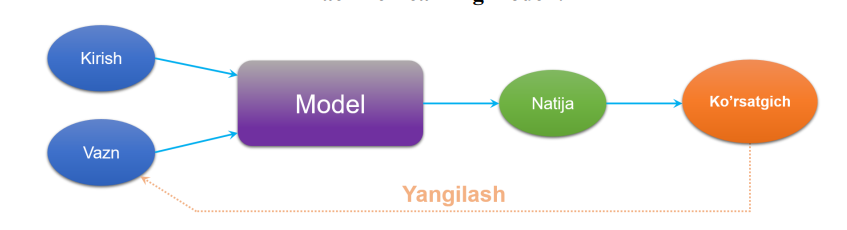

In [ ]:
from sklearn.linear_model import LinearRegression

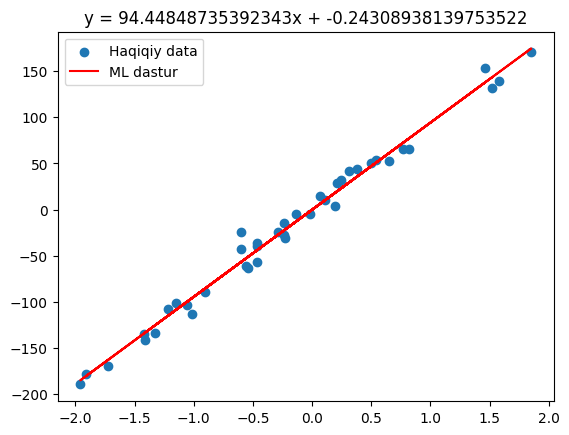

In [ ]:
# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data =  data[0], data[1]

#regrissiya
regrission = LinearRegression().fit(x_data, y_data)
y_pred = regrission.predict(x_data)

#plotting
plt.scatter(x_data, y_data, label='Haqiqiy data')
plt.plot(x_data, y_pred, color='red', label='ML dastur')
plt.legend()
equation = f'y = {regrission.coef_[0]}x + {regrission.intercept_}'
plt.title(equation)
plt.show()

# **Deep Learning modelini o'qitish**

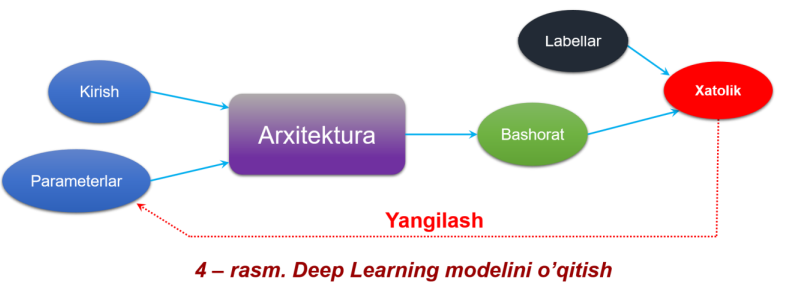

In [ ]:
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


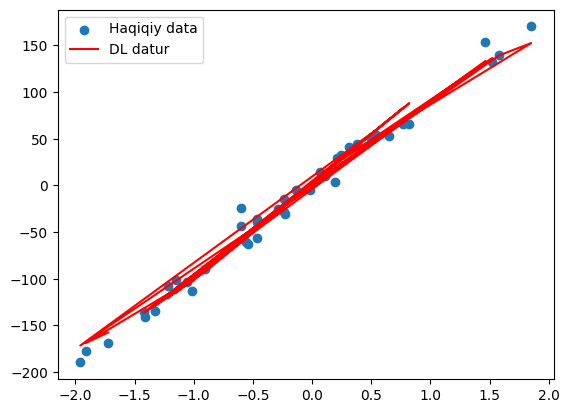

In [ ]:
# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data = data[0]
y_data = data[1]

# regressiya
regrission = MLPRegressor(max_iter=2000).fit(x_data, y_data)
y_pred = regrission.predict(x_data)

# plotting
plt.scatter(x_data, y_data, label="Haqiqiy data")
plt.plot(x_data, y_pred, color='red', label="DL datur")
plt.legend()
plt.show()

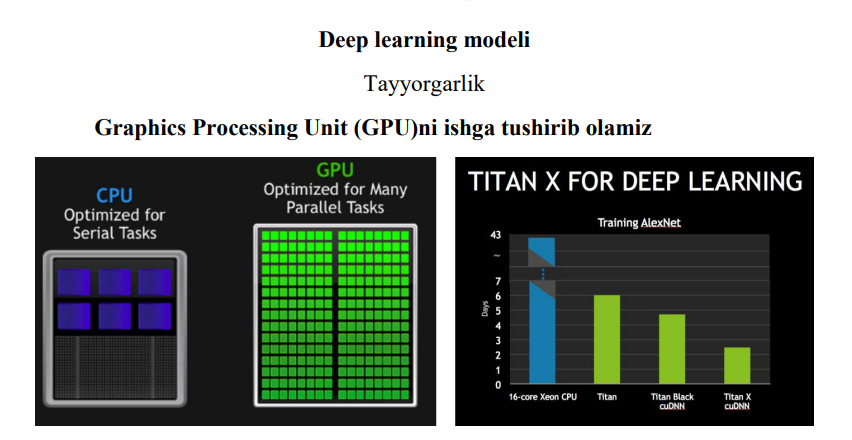

In [ ]:
import torch
torch.cuda.is_available()

True

## Kutubxonani o'rnatib olamiz

In [ ]:
import fastai

# versiyani teksiramiz
torch.__version__, fastai.__version__

('2.6.0+cu124', '2.7.19')

## Datani yuklab olamiz

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [ ]:
# funksiya yaratib olamiz
def is_cat(x): return x[0].islower()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 176MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.137842,0.029068,0.989851,00:45


epoch,train_loss,valid_loss,accuracy,time
0,0.057472,0.012516,0.995940,00:44


In [ ]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.026665,0.018761,0.993234,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.031507,0.075647,0.981732,00:45
1,0.025753,0.010998,0.994587,00:50


## Moelni ishlashini tekshiramiz

In [ ]:
import ipywidgets as widgets

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
from urllib.request import proxy_bypass
img = PILImage.create(upload.data[-1])
pred, _, prob = learn.predict(img)

print(f"Mushukmi?: {pred}")
print(f"Aniqlik: {prob[1].item():.3f}")

Mushukmi?: True
Aniqlik: 1.000
